<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Neural Network - Keras - Cancer
</b></font> </br></p>

---


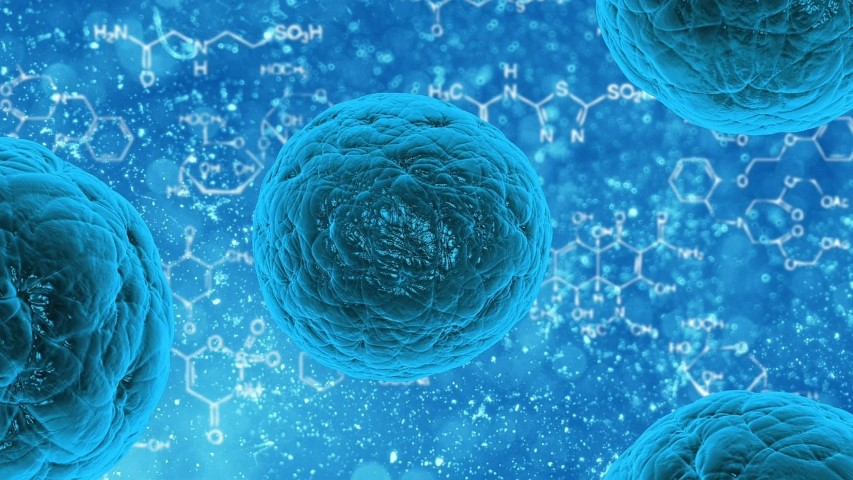

Bild von <a href="https://pixabay.com/de/users/publicdomainpictures-14/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=163711">PublicDomainPictures</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=163711">Pixabay</a>

# 1 | Understand
---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
⚠️ Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
📒 Anwendungsfall
</font></p>




**Beschreibung:**   
Diese Arbeit entstand aus dem Wunsch, Gewebeproben ausschließlich auf der Grundlage einer Feinnadelpunktion (FNA) genau zu diagnostizieren. In Zusammenarbeit mit Prof. Mangasarian und zwei seiner Doktoranden, Rudy Setiono und Kristin Bennett , wurde mithilfe der Multisurface-Methode (MSM) zur Mustertrennung dieser neun Merkmale ein Klassifikator erstellt, der 97 % der neuen Fälle erfolgreich diagnostizierte. Der resultierende Datensatz ist als Wisconsin Breast Cancer Data bekannt.


Die Arbeit an der Bildanalyse begann 1990 mit der Aufnahme von Nick Street in das Forschungsteam. Ziel war es, die Probe anhand eines digitalen Bildes eines kleinen Abschnitts des FNA-Objektträgers zu diagnostizieren.

**Diagnoseablauf:**

Es wird aus dem Gewebe eine FNA entnommen. Dieses Material wird dann auf einen Objektträger montiert und gefärbt, um die Zellkerne hervorzuheben. Ein Teil des Objektträgers, in dem die Zellen gut differenziert sind, wird dann mit einer Digitalkamera und einem Framegrabber-Board gescannt.
Anschließend isoliert der Anwender die einzelnen Zellkerne . Mit einem Mauszeiger zeichnet der Benutzer die ungefähre Grenze jedes Kerns. Mithilfe eines Computer-Vision-Ansatzes, konvergieren diese Annäherungen dann an die genauen nuklearen Grenzen. Sobald alle (oder die meisten) Kerne auf diese Weise isoliert wurden, berechnet das Programm Werte für jedes der zehn Merkmale jedes Kerns und misst Größe, Form und Textur. Der Mittelwert, der Standardfehler und die Extremwerte dieser Merkmale werden berechnet, was zu insgesamt 30 Kernmerkmalen für jede Probe führt.

[DataSet](https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original)

[Info](https://pages.cs.wisc.edu/~olvi/uwmp/cancer.html)

**Features:**


+ Dicke: 1 - 10
+ Einheitlichkeit der Zellgröße: 1 - 10
+ Gleichmäßigkeit der Zellform: 1 - 10
+ Randhaftung: 1 - 10
+ Größe einzelner Epithelzellen: 1 - 10
+ Nackte Kerne: 1 - 10
+ Blandes Chromatin: 1 - 1
+ Normale Nukleolen: 1 - 10
+ Mitosen: 1 - 10

**Klassen:**

+ Klasse: (2 für gutartig, 4 für bösartig)

In [ ]:
!pip install -q ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
data = breast_cancer_wisconsin_original.data.features
target = breast_cancer_wisconsin_original.data.targets

# **2 <font color='orange'>|</font> Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

<p><font color='black' size="5">
Datentyp
</font></p>

In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Missing Values
</font></p>

In [ ]:
data = data.dropna()

In [ ]:
target = target.loc[data.index]

<p><font color='black' size="5">
Codieren Target auf 0/1
</font></p>

In [ ]:
target.Class.replace([2, 4], [0, 1], inplace=True)

<p><font color='black' size="5">
Scalieren
</font></p>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data[num_col] = MinMaxScaler().fit_transform(data[num_col])

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">
Train-Test-Split
</font></p>


In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=42, stratify=target)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

<p><font color='black' size="5">
Modellierung des neuronalen Netzes
</font></p>


<p><font color='black' size="5">
Import der Module
</font></p>



In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
from keras.layers import Input, Dense
from keras.models import Sequential

<p><font color='black' size="5">
Aufbau des Neuronale Netzes
</font></p>


In [ ]:
model = Sequential()
model.add(Input(shape=(9,)))                     # Expliziter Input Layer
model.add(Dense(20, activation="relu"))          # Hidden Layer
model.add(Dense(1, activation="sigmoid"))        # Output Layer

In [ ]:
model.summary()

<p><font color='black' size="5">
Modell compilieren
</font></p>



In [ ]:
from tensorflow import keras
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

<p><font color='black' size="5">
Training
</font></p>


In [ ]:
model.fit(data_train, target_train, epochs=100)

In [ ]:
print(model.history.params)
print(model.history.history.keys())
save_history = model.history.history.keys()

<p><font color='black' size="5">
Loss-Entwickung
</font></p>

In [ ]:
import plotly.express as px
title_ = 'Loss-Entwicklung'
px.line(y=model.history.history['loss'], title=title_, labels={'x':'Epochen', 'y':'Loss-Wert'}, width=800, height=400)

# **4 <font color='orange'>|</font> Evaluate**
---

[Modellperformance](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)


<p><font color='black' size="5">
Accuracy
</font></p>

In [ ]:
train_loss, train_accuracy = model.evaluate(data_train, target_train)
acc_train = train_accuracy * 100
print (f'Modell: {model} -- Train -- Accuracy: {acc_train:5.2f}%')

In [ ]:
test_loss, test_accuracy = model.evaluate(data_test, target_test)
acc_test = test_accuracy * 100
print (f'Modell: {model} -- Test -- Accuracy: {acc_test:5.2f}%')


<p><font color='black' size="5">
Confusion Matrix
</font></p>

In [ ]:
target_test_pred =  model.predict(data_test)

In [ ]:
schwellwert = 0.5
target_test_pred_ = (target_test_pred[:, 0] >= schwellwert) * 1
# target_test_ = (target_test[:, 1] >= schwellwert) * 1

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(target_test, target_test_pred_)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No','Yes'])
disp.plot(cmap='Blues')

In [ ]:
print(classification_report(target_test, target_test_pred_, target_names=['No','Yes']))

<p><font color='black' size="5">
Aufbau Analysewürfel
</font></p>

In [ ]:
# Übernahme der Testdaten
cube = data_test.copy()
cube.reset_index(inplace=True)

# Übernahem Target real & predict
cube['real'] = pd.DataFrame(target_test.values, columns=['real'])
cube['predict'] = pd.DataFrame(target_test_pred_, columns=['predict'])

# Erstellung 2D Features über Dimensionsreduktion PCA - unsupervised
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(data_test)
pca_df = pd.DataFrame(pca)

# Cube um pca erweitern
cube['PCA1'] = pca_df[0]
cube['PCA2'] = pca_df[1]

<p><font color='black' size="5">
Visualisierung real vs predict
</font></p>

In [ ]:
import plotly.express as px
import plotly.subplots as sp

In [ ]:
# Histogramm
title_ = 'Histogramm real vs predict'
fig = px.histogram(cube, x=['real', 'predict'], nbins=2, text_auto=".2s",title=title_)
fig.update_layout(barmode='group',bargap=0.1, width=600, height=600)
fig.show()

In [ ]:
# 2 x Scatterplots

cube['real_cat'] = cube['real'].astype(str)
cube['predict_cat'] = cube['predict'].astype(str)

# Farbzuteilung für Kategoriewerte
color_mapping = {'0.0': 'red', '1.0': 'blue'}

title_ = 'Streupunktdiagramm real'
img1 = px.scatter(cube, x='PCA1', y='PCA2', color='real_cat', color_discrete_map=color_mapping, width=600, height=600)

title_ = 'Streupunktdiagramm predict'
img2 = px.scatter(cube, x='PCA1', y='PCA2', color='predict_cat', color_discrete_map=color_mapping, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Scatterplot real', 'Scatterplot predict'))

for trace in img1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in img2.data:
    fig.add_trace(trace, row=1, col=2)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text=title_)

# Plot anzeigen
fig.show()

In [ ]:
# real <> predict
cube[cube.real != cube.predict].describe().T

In [ ]:
cube[cube.real != cube.predict]

# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>